# Deep Learning

- 01 What is "Deep Learning?" 
- 02 Why Deep Learning?    
- 03 The Perceptron (Neural units)  
- 04 Shallow Neural Network  
- 05 Activation functions  
- 06 Loss functions   
- 07 Cross entropy  

## What is "Deep Learning?"

[Deep learning](https://en.wikipedia.org/wiki/Deep_learning) is the stacking of artificial neural networks (ANNs) to create stacked neural networks, [deep belief networks](https://en.wikipedia.org/wiki/Deep_belief_network), [recurrent neural networks](https://en.wikipedia.org/wiki/Recurrent_neural_network) and deep generative models. A deep neural network (DNN) is an ANN with multiple hidden layers between the input and output layers.

An ANN is based on a collection of connected units called artificial neurons, (analogous to axons in a biological brain). Each connection (synapse) between neurons can transmit a signal to another neuron. The receiving (postsynaptic) neuron can process the signal(s) and then signal downstream neurons connected to it.

_ Deep learning is basically the deep stacking of artificial neurons to learn complex models of data. _

## Why Deep Learning?

- It works

Deep learning and neural networks are increasingly important concepts as demonstrated through their performance on difficult problems in computer vision medical diagnosis, natural language processing and many other domains. 

- Learns feature selection   

Deep learning algorithms are unique in that they try to learn latent features from data, as opposed to traditional machine learning where features selection is typically handcrafted. 

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

## MNIST data

The [MNIST database](http://yann.lecun.com/exdb/mnist/) of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

In [ ]:
# load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


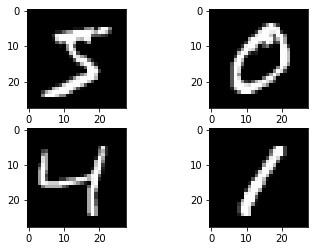

In [ ]:
# plot first 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

The training dataset is structured as a 3-dimensional array of each image, and that images width and image height (28×28 pixels per image).

In [ ]:
## 60K 28×28 sized training images
print (X_train.shape)

(60000, 28, 28)


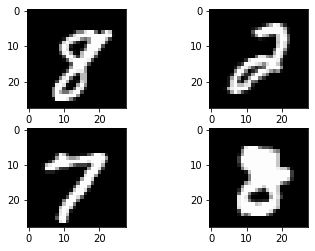

In [ ]:
# plot 4 more images as gray scale
plt.subplot(221)
plt.imshow(X_train[55], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[555], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[5555], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[55555], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

![Neural Network](https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/img/Neural_Network.png)
  

[But what *is* a Neural Network?](https://youtu.be/aircAruvnKk)   


## The Perceptron (Neural units)

The [perceptron]()https://en.wikipedia.org/wiki/Perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide
whether an input, represented by a vector of numbers, belongs to some
specific class or not). It is a type of linear classifier, i.e. a
classification algorithm that makes its predictions based on a linear
predictor function combining a set of weights with the feature
vector. 

The perceptron algorithm dates back to the late 1950s, and is the basis of [artificial neural networks](https://en.wikipedia.org/wiki/Artificial_neural_network).

Definition
----------

In the modern sense, the perceptron is an algorithm for learning a
binary classifier: a function that maps its input (a real-valued
[vector]) to an output value $f(x)$ (a single [binary] value):

$$f(x) = \begin{cases}1 & \text{if }\ w \cdot x + b > 0\\0 & \text{otherwise}\end{cases}$$

where is a vector of real-valued weights, $w \cdot x$ is the [dot
product] $\sum_{i=1}^m w_i x_i$, where m is the number of inputs to the
perceptron and is the *bias*. The bias shifts the decision boundary away
from the origin and does not depend on any input value.

The value of $f(x)$ (0 or 1) is used to classify as either a positive or
a negative instance, in the case of a binary classification problem. If
is negative, then the weighted combination of inputs must produce a
positive value greater than $|b|$ in order to push the classifier neuron
over the 0 threshold. Spatially, the bias alters the position (though
not the orientation) of the decision boundary. The perceptron learning
algorithm does not terminate if the learning set is not linearly
separable. If the vectors are not linearly separable learning will
never reach a point where all vectors are classified properly. The most
famous example of the perceptron's inability to solve problems with
linearly nonseparable vectors is the Boolean exclusive-or problem. The
solution spaces of decision boundaries for all binary functions and
learning behaviors are studied in the reference.

In the context of neural networks, a perceptron is an _artificial
neuron_ using the [Heaviside step function](https://en.wikipedia.org/wiki/Heaviside_step_function) as the activation function.
The perceptron algorithm is also termed the **single-layer perceptron**,
to distinguish it from a multilayer perceptron, which is a misnomer
for a more complicated neural network. As a linear classifier, the
single-layer perceptron is the simplest [feedforward neural network](https://en.wikipedia.org/wiki/Feedforward_neural_network).

Learning algorithm
------------------

Below is an example of a learning algorithm for a (single-layer)
perceptron. For [multilayer perceptrons], where a hidden layer exists,
more sophisticated algorithms such as [backpropagation] must be used.
Alternatively, methods such as the [delta rule] can be used if the
function is non-linear and differentiable, although the one below will
work as well.

When multiple perceptrons are combined in an artificial neural network,
each output neuron operates independently of all the others; thus,
learning each output can be considered in isolation. ![A diagram showing a perceptron updating its linear boundary as more
training examples are added.](http://nikbearbrown.com/YouTube/MachineLearning/IMG/Perceptron_example.svg.png)

### Definitions

We first define some variables:

-   $y = f(\mathbf{z})$ denotes the *output* from the perceptron for an
    input vector $\mathbf{z}$.
-   $D = \{(\mathbf{x}_1,d_1),\dots,(\mathbf{x}_s,d_s)\}$ is the
    *training set* of $s$ samples, where:
    -   $\mathbf{x}_j$ is the $n$-dimensional input vector.
    -   $d_j$ is the desired output value of the perceptron for that
        input.

We show the values of the features as follows:

-   $x_{j,i}$ is the value of the $i$th feature of the $j$th training
    *input vector*.
-   $x_{j,0} = 1$.

To represent the weights:

-   $w_i$ is the $i$th value in the *weight vector*, to be multiplied by
    the value of the $i$th input feature.
-   Because $x_{j,0} = 1$, the $w_0$ is effectively a bias that we use
    instead of the bias constant $b$.

To show the time-dependence of $\mathbf{w}$, we use:

-   $w_i(t)$ is the weight $i$ at time $t$.

Unlike other linear classification algorithms such as [logistic
regression], there is no need for a *learning rate* in the perceptron
algorithm. This is because multiplying the update by any constant simply
rescales the weights but never changes the sign of the prediction.

![The appropriate weights are applied to the inputs, and the resulting
weighted sum passed to a function that produces the output o.](http://nikbearbrown.com/YouTube/MachineLearning/IMG/Perceptron.svg.png)

### Steps

1. Initialize the weights and the threshold. Weights may
be initialized to 0 or to a small random value. In the example below, we
use 0.  
2. For each example in our training set , perform the following
steps over the input $\mathbf{x}_j$ and desired output $d_j$   

Calculate the actual output:   

a. $$\begin{align}
y_j(t) &= f[\mathbf{w}(t)\cdot\mathbf{x}_j] \\
&= f[w_0(t)x_{j,0} + w_1(t)x_{j,1} + w_2(t)x_{j,2} + \dotsb + w_n(t)x_{j,n}]
\end{align}$$

b. Update the weights:  

$$w_i(t+1) = w_i(t) + (d_j - y_j(t)) x_{j,i}$$, for all features
$0 \leq i \leq n$.   

**offline learning**

For offline learning, the step 2 may be repeated until the iteration error  $\frac{1}{s} \sum_{j=1}^s |d_j - y_j(t)|$ is less than a user-specified error threshold $\gamma$, or a predetermined number of iterations have been completed. The algorithm updates the weights after steps 2a and 2b. These weights are immediately applied to a pair in the training set, and subsequently updated, rather than waiting until all pairs in the training set have undergone these steps. 

Multiclass perceptron
---------------------

Like most other techniques for training linear classifiers, the
perceptron generalizes naturally to multiclass classification. Here,
the input $x$ and the output $y$ are drawn from arbitrary sets. A
feature representation function $f(x,y)$ maps each possible input/output
pair to a finite-dimensional real-valued feature vector. As before, the
feature vector is multiplied by a weight vector $w$, but now the
resulting score is used to choose among many possible outputs:

$$\hat y = \operatorname{argmax}_y f(x,y) \cdot w.$$ ≈ Learning again
iterates over the examples, predicting an output for each, leaving the
weights unchanged when the predicted output matches the target, and
changing them when it does not. The update becomes:

$$w_{t+1} = w_t + f(x, y) - f(x,\hat y).$$

This multiclass feedback formulation reduces to the original perceptron
when $x$ is a real-valued vector, $y$ is chosen from $\{0,1\}$, and
$f(x,y) = y x$.

For certain problems, input/output representations and features can be
chosen so that $\mathrm{argmax}_y f(x,y) \cdot w$ can be found
efficiently even though $y$ is chosen from a very large or even infinite
set.

In recent years, perceptron training has become popular in the field of
[natural language processing](https://en.wikipedia.org/wiki/Natural_language_processing) for such tasks as [part-of-speech tagging](https://en.wikipedia.org/wiki/Part-of-speech_tagging)
and [syntactic parsing](https://en.wikipedia.org/wiki/Parsing).



## Artificial neural network

[Artificial neural networks](https://en.wikipedia.org/wiki/Artificial_neural_network) (**ANNs**) or **[connectionist] systems**
are computing systems inspired by the biological neural networks that
constitute animal brains. Such systems learn (progressively improve
performance) to do tasks by considering examples, generally without
task-specific programming. For example, in image recognition, they might
learn to identify images that contain cats by analyzing example images
that have been manually labeled as “cat” or “no cat” and using the
analytic results to identify cats in other images. They have found most
use in applications difficult to express in a traditional computer
algorithm using rule-based programming.

An ANN is based on a collection of connected units called artificial
neurons, (analogous to axons in a biological brain). Each
connection synapse) between neurons can transmit a signal to another
neuron. The receiving (postsynaptic) neuron can process the signal(s)
and then signal downstream neurons connected to it. Neurons may have
state, generally represented by [real numbers], typically between 0 and 1.

Neurons and synapses may also have a weight that varies as learning
proceeds, which can increase or decrease the strength of the signal that
it sends downstream. Further, they may have a threshold such that only
if the aggregate signal is below (or above) that level is the downstream
signal sent.

Typically, neurons are organized in layers. Different layers may perform
different kinds of transformations on their inputs. Signals travel from
the first (input), to the last (output) layer, possibly after traversing
the layers multiple times.

The original goal of the neural network approach was to solve problems
in the same way that a human brain would. Over time, attention focused
on matching specific mental abilities, leading to deviations from
biology such as backpropagation, or passing information in the reverse
direction and adjusting the network to reflect that information.

Neural networks have been used on a variety of tasks, including
computer vision, speech recognition, machine translation, social
network filtering, playing board and video games, medical diagnosis and
in many other domains.

## Backpropagation Algorithm


**Backpropagation** is a method used in artificial neural networks to
calculate a gradient that is needed in the calculation of the
weights to be used in the network. It is commonly used to train
deep neural networks, a term referring to neural networks with
more than one hidden layer.

Backpropagation is a special case of an older and more general technique
called automatic differentiation. In the context of learning,
backpropagation is commonly used by the gradient descent optimization
algorithm to adjust the weight of neurons by calculating the gradient
of the loss function. This technique is also sometimes called
**backward propagation of errors**, because the error is calculated at
the output and distributed back through the network layers.


![Neural Network Backpropagation](https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/img/Neural_Network_Backpropagation.png)

[What is backpropagation really doing?](https://youtu.be/Ilg3gGewQ5U)   

![Gradient Descent](https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/img/Gradient_Descent.png)

[Gradient descent, how neural networks learn?](https://youtu.be/IHZwWFHWa-w)  

![Backpropagation Calculus](https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/img/Backpropagation_Calculus.png)

[Backpropagation calculus](https://youtu.be/tIeHLnjs5U8)   


**Loss function**


Sometimes referred to as the **cost function** or **error function**
(not to be confused with the Gauss error function), the loss function
is a function that maps values of one or more variables onto a real
number intuitively representing some \"cost\" associated with those
values. For backpropagation, the loss function calculates the difference
between the network output and its expected output, after a case
propagates through the network.

### Assumptions

Two assumptions must be made about the form of the error function.^1
The first is that it can be written as an average
$E=\frac{1}{n}\sum_xE_x$ over error functions $E_x$, for $n$ individual
training examples, $x$. The reason for this assumption is that the
backpropagation algorithm calculates the gradient of the error function
for a single training example, which needs to be generalized to the
overall error function. The second assumption is that it can be written
as a function of the outputs from the neural network.

### Example loss function

Let $y,y'$ be vectors in $\mathbb{R}^n$.

Select an error function $E(y,y')$ measuring the difference between two
outputs. The standard choice is the square of the Euclidean distance
between the vectors $y$ and $y'$:

$E(y,y') = \tfrac{1}{2} \lVert y-y'\rVert^2$

Note that the factor of $\tfrac{1}{2}$ conveniently cancels the exponent
when the error function is subsequently differentiated.

The error function over $n$ training examples can simply be written as
an average of losses over individual
examples$$E=\frac{1}{2n}\sum_x\lVert (y(x)-y'(x)) \rVert^2$$

and therefore, the partial derivative with respect to the
outputs$$\frac{\partial E}{\partial y'} = y'-y$$



**Algorithm**

Let $N$ be a neural network with $e$ connections, $m$ inputs, and $n$
outputs.

Below, $x_1,x_2,\dots$ will denote vectors in $\mathbb{R}^m$,
$y_1,y_2,\dots$ vectors in $\mathbb{R}^n$, and $w_0, w_1, w_2, \ldots$
vectors in $\mathbb{R}^e$. These are called *inputs*, *outputs* and
*weights* respectively.

The neural network corresponds to a function $y = f_N(w, x)$ which,
given a weight $w$, maps an input $x$ to an output $y$.

The optimization takes as input a sequence of *training examples*
$(x_1,y_1), \dots, (x_p, y_p)$ and produces a sequence of weights
$w_0, w_1, \dots, w_p$ starting from some initial weight $w_0$, usually
chosen at random.

These weights are computed in turn: first compute $w_i$ using only
$(x_i, y_i, w_{i-1})$ for $i = 1, \dots, p$. The output of the algorithm
is then $w_p$, giving us a new function $x \mapsto f_N(w_p, x)$. The
computation is the same in each step, hence only the case $i = 1$ is
described.

Calculating $w_1$ from $(x_1, y_1, w_0)$ is done by considering a
variable weight $w$ and applying gradient descent to the function
$w\mapsto E(f_N(w, x_1), y_1)$ to find a local minimum, starting at
$w = w_0$.

This makes $w_1$ the minimizing weight found by gradient descent.


**Algorithm in code**


To implement the algorithm above, explicit formulas are required for the
gradient of the function $w \mapsto E(f_N(w, x), y)$ where the function
is $E(y,y')= |y-y'|^2$.

The learning algorithm can be divided into two phases: propagation and
weight update.

### Phase 1: propagation

Each propagation involves the following steps:

1.  Propagation forward through the network to generate the output
    value(s)
2.  Calculation of the cost (error term)
3.  Propagation of the output activations back through the network using
    the training pattern target in order to generate the deltas (the
    difference between the targeted and actual output values) of all
    output and hidden neurons.

### Phase 2: weight update

For each weight, the following steps must be followed:

1.  The weight\'s output delta and input activation are multiplied to
    find the gradient of the weight.
2.  A ratio (percentage) of the weight\'s gradient is subtracted from
    the weight.

This ratio (percentage) influences the speed and quality of learning; it
is called the *learning rate*. The greater the ratio, the faster the
neuron trains, but the lower the ratio, the more accurate the training
is. The sign of the gradient of a weight indicates whether the error
varies directly with, or inversely to, the weight. Therefore, the weight
must be updated in the opposite direction, \"descending\" the gradient.

Learning is repeated (on new batches) until the network performs
adequately.

### Pseudocode

The following is pseudocode for a stochastic gradient descent
algorithm for training a three-layer network (only one hidden layer):

```python
  initialize network weights (often small random values)\
  **do**\
     **forEach** training example named ex\
        prediction = _neural-net-output_(network, ex)  *// forward pass*\
        actual = _teacher-output_(ex)\
        compute error (prediction - actual) at the output units\
          *// backward pass*\
           *// backward pass continued*\
        update network weights *// input layer not modified by error estimate*\
  **until** all examples classified correctly or another stopping criterion satisfied\
  **return** the network
```

The lines labeled \"backward pass\" can be implemented using the
backpropagation algorithm, which calculates the gradient of the error of
the network regarding the network\'s modifiable weights.



## How many input neurons?

What is the input layer for the MNIST data?  Each image is $28x28 = 784$.

In [1]:
## 10K 28×28 sized test images
X_test.shape

NameError: ignored

In [2]:
28*28

784

For a multi-layer perceptron model we must reduce the images down into a a single input layer as a vector of pixels. In this case the 28×28 sized images will be 784 pixel input values (28x28=784).

In [3]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')

NameError: ignored

The pixel values are gray scale between 0 and 255. Scaling of input values when using neural network models is a good idea. Neural network models propagate values and the rate of propagation can be effected by their scale.

In [4]:
# Scale the data between 0 and 1

X_train /= 255.0
X_test /= 255.0

NameError: ignored

## Shallow Neural Network


A shallow neural network has few layers (just one dense layer in this case). Dense means every neuron connected to every other.


In [ ]:
X_test[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

Finally, the output variable is an integer from 0 to 9. This is a multi-class classification problem. As such, it is good practice to use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix.

We can easily do this using the built-in np_utils.to_categorical() helper function in Keras.

In [ ]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [ ]:
y_test[0:5]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [ ]:
y_train[0:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [ ]:
def shallow_net_A(n=55,i=784,o=10):
    # create simple one dense layer net
    # default 55 neurons, input 784, output 10
    net = Sequential()
    net.add(Dense(n, activation='sigmoid', input_shape=(i,)))
    net.add(Dense(10, activation='softmax'))
    # Compile net
    net.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])
    return net

In [ ]:
nn=shallow_net_A()

In [ ]:
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 55)                43175     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                560       
Total params: 43,735
Trainable params: 43,735
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn.fit(X_train, y_train, batch_size=128, epochs=99, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/99
60000/60000 [==============================] - 1s - loss: 0.0943 - acc: 0.0993 - val_loss: 0.0932 - val_acc: 0.1032
Epoch 2/99
60000/60000 [==============================] - 0s - loss: 0.0927 - acc: 0.0984 - val_loss: 0.0922 - val_acc: 0.0985
Epoch 3/99
60000/60000 [==============================] - 1s - loss: 0.0920 - acc: 0.0984 - val_loss: 0.0916 - val_acc: 0.1011
Epoch 4/99
60000/60000 [==============================] - 1s - loss: 0.0914 - acc: 0.1155 - val_loss: 0.0911 - val_acc: 0.1264
Epoch 5/99
60000/60000 [==============================] - 0s - loss: 0.0909 - acc: 0.1447 - val_loss: 0.0907 - val_acc: 0.1545
Epoch 6/99
60000/60000 [==============================] - 1s - loss: 0.0905 - acc: 0.1690 - val_loss: 0.0903 - val_acc: 0.1787
Epoch 7/99
60000/60000 [==============================] - 1s - loss: 0.0901 - acc: 0.1906 - val_loss: 0.0899 - val_acc: 0.2001
Epoch 8/99
60000/60000 [==============================] - 1s 

60000/60000 [==============================] - 0s - loss: 0.0665 - acc: 0.5849 - val_loss: 0.0658 - val_acc: 0.5864
Epoch 65/99
60000/60000 [==============================] - 1s - loss: 0.0661 - acc: 0.5898 - val_loss: 0.0654 - val_acc: 0.5922
Epoch 66/99
60000/60000 [==============================] - 1s - loss: 0.0656 - acc: 0.5940 - val_loss: 0.0649 - val_acc: 0.5957
Epoch 67/99
60000/60000 [==============================] - 1s - loss: 0.0652 - acc: 0.5991 - val_loss: 0.0645 - val_acc: 0.6008
Epoch 68/99
60000/60000 [==============================] - 1s - loss: 0.0647 - acc: 0.6039 - val_loss: 0.0640 - val_acc: 0.6062
Epoch 69/99
60000/60000 [==============================] - 1s - loss: 0.0643 - acc: 0.6085 - val_loss: 0.0636 - val_acc: 0.6107
Epoch 70/99
60000/60000 [==============================] - 1s - loss: 0.0638 - acc: 0.6137 - val_loss: 0.0631 - val_acc: 0.6152
Epoch 71/99
60000/60000 [==============================] - 0s - loss: 0.0634 - acc: 0.6177 - val_loss: 0.0627 - val_

In [ ]:
# 68% accuracy after 99 epochs
nn.evaluate(X_test, y_test)

 8608/10000 [========================>.....] - ETA: 0s

[0.051187293976545332, 0.71989999999999998]

In [ ]:
nn.fit(X_train, y_train, batch_size=128, epochs=99, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/99
60000/60000 [==============================] - 0s - loss: 0.0516 - acc: 0.7109 - val_loss: 0.0508 - val_acc: 0.7233
Epoch 2/99
60000/60000 [==============================] - 0s - loss: 0.0513 - acc: 0.7132 - val_loss: 0.0505 - val_acc: 0.7261
Epoch 3/99
60000/60000 [==============================] - 0s - loss: 0.0509 - acc: 0.7160 - val_loss: 0.0501 - val_acc: 0.7283
Epoch 4/99
60000/60000 [==============================] - 1s - loss: 0.0506 - acc: 0.7184 - val_loss: 0.0498 - val_acc: 0.7298
Epoch 5/99
60000/60000 [==============================] - 1s - loss: 0.0502 - acc: 0.7204 - val_loss: 0.0494 - val_acc: 0.7319
Epoch 6/99
60000/60000 [==============================] - 1s - loss: 0.0499 - acc: 0.7231 - val_loss: 0.0491 - val_acc: 0.7344
Epoch 7/99
60000/60000 [==============================] - 1s - loss: 0.0495 - acc: 0.7254 - val_loss: 0.0487 - val_acc: 0.7378
Epoch 8/99
60000/60000 [==============================] - 1s 

60000/60000 [==============================] - 0s - loss: 0.0351 - acc: 0.8283 - val_loss: 0.0342 - val_acc: 0.8391
Epoch 65/99
60000/60000 [==============================] - 0s - loss: 0.0349 - acc: 0.8294 - val_loss: 0.0340 - val_acc: 0.8396
Epoch 66/99
60000/60000 [==============================] - 0s - loss: 0.0348 - acc: 0.8302 - val_loss: 0.0338 - val_acc: 0.8402
Epoch 67/99
60000/60000 [==============================] - 1s - loss: 0.0346 - acc: 0.8309 - val_loss: 0.0336 - val_acc: 0.8414
Epoch 68/99
60000/60000 [==============================] - 0s - loss: 0.0344 - acc: 0.8320 - val_loss: 0.0335 - val_acc: 0.8428
Epoch 69/99
60000/60000 [==============================] - 0s - loss: 0.0342 - acc: 0.8328 - val_loss: 0.0333 - val_acc: 0.8435
Epoch 70/99
60000/60000 [==============================] - 0s - loss: 0.0341 - acc: 0.8337 - val_loss: 0.0331 - val_acc: 0.8442
Epoch 71/99
60000/60000 [==============================] - 0s - loss: 0.0339 - acc: 0.8346 - val_loss: 0.0329 - val_

In [ ]:
# 86% accuracy after another 99 epochs
nn.evaluate(X_test, y_test)

 9024/10000 [==========================>...] - ETA: 0s

[0.028857796752452852, 0.86160000000000003]

In [ ]:
nn.fit(X_train, y_train, batch_size=128, epochs=99, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/99
60000/60000 [==============================] - 1s - loss: 0.0297 - acc: 0.8519 - val_loss: 0.0287 - val_acc: 0.8619
Epoch 2/99
60000/60000 [==============================] - 1s - loss: 0.0296 - acc: 0.8528 - val_loss: 0.0286 - val_acc: 0.8625
Epoch 3/99
60000/60000 [==============================] - 1s - loss: 0.0295 - acc: 0.8531 - val_loss: 0.0285 - val_acc: 0.8628
Epoch 4/99
60000/60000 [==============================] - 1s - loss: 0.0293 - acc: 0.8538 - val_loss: 0.0284 - val_acc: 0.8636
Epoch 5/99
60000/60000 [==============================] - 1s - loss: 0.0292 - acc: 0.8543 - val_loss: 0.0283 - val_acc: 0.8640
Epoch 6/99
60000/60000 [==============================] - 1s - loss: 0.0291 - acc: 0.8548 - val_loss: 0.0281 - val_acc: 0.8646
Epoch 7/99
60000/60000 [==============================] - 1s - loss: 0.0290 - acc: 0.8550 - val_loss: 0.0280 - val_acc: 0.8651
Epoch 8/99
60000/60000 [==============================] - 0s 

60000/60000 [==============================] - 1s - loss: 0.0241 - acc: 0.8722 - val_loss: 0.0232 - val_acc: 0.8800
Epoch 65/99
60000/60000 [==============================] - 0s - loss: 0.0241 - acc: 0.8724 - val_loss: 0.0231 - val_acc: 0.8802
Epoch 66/99
60000/60000 [==============================] - 0s - loss: 0.0240 - acc: 0.8726 - val_loss: 0.0230 - val_acc: 0.8803
Epoch 67/99
60000/60000 [==============================] - 0s - loss: 0.0240 - acc: 0.8728 - val_loss: 0.0230 - val_acc: 0.8803
Epoch 68/99
60000/60000 [==============================] - 0s - loss: 0.0239 - acc: 0.8730 - val_loss: 0.0229 - val_acc: 0.8802
Epoch 69/99
60000/60000 [==============================] - 0s - loss: 0.0238 - acc: 0.8733 - val_loss: 0.0229 - val_acc: 0.8803
Epoch 70/99
60000/60000 [==============================] - 0s - loss: 0.0238 - acc: 0.8735 - val_loss: 0.0228 - val_acc: 0.8807
Epoch 71/99
60000/60000 [==============================] - 0s - loss: 0.0237 - acc: 0.8738 - val_loss: 0.0227 - val_

In [ ]:
# 88% accuracy after another 99 epochs
nn.evaluate(X_test, y_test)

 9696/10000 [============================>.] - ETA: 0s

[0.021296201345324516, 0.88680000000000003]

## Activation functions

In computational networks, the [activation function](https://en.wikipedia.org/wiki/Activation_function) of a node
defines the output of that node given an input or set of inputs. A
standard computer chip circuit can be seen as a digital network of
activation functions that can be “ON” (1) or “OFF” (0), depending on
input. This is similar to the behavior of the linear perceptron in
neural networks. However, only *nonlinear* activation functions allow
such networks to compute nontrivial problems using only a small number
of nodes. In artificial neural networks this function is also called
the **transfer function**.

Functions
---------

In biologically inspired neural networks, the activation function is
usually an abstraction representing the rate of action potential
firing in the cell. In its simplest form, this function is binary—that
is, either the neuron is firing or not. The function looks like
$\phi(v_i)=U(v_i)$, where $U$ is the Heaviside step function. In this
case many neurons must be used in computation beyond linear separation
of categories.

A line of positive slope may be used to reflect the increase in firing
rate that occurs as input current increases. Such a function would be of
the form $\phi(v_i)=\mu v_i$, where $\mu$ is the slope. This activation
function is linear, and therefore has the same problems as the binary
function. In addition, networks constructed using this model have
unstable convergence because neuron inputs along favored paths tend to
increase without bound, as this function is not normalizable.

All problems mentioned above can be handled by using a normalizable
sigmoid activation function. One realistic model stays at zero until
input current is received, at which point the firing frequency increases
quickly at first, but gradually approaches an asymptote at 100% firing
rate. Mathematically, this looks like $\phi(v_i)=U(v_i)\tanh(v_i)$,
where the hyperbolic tangent function can be replaced by any sigmoid
function. This behavior is realistically reflected in the neuron, as
neurons cannot physically fire faster than a certain rate. This model
runs into problems, however, in computational networks as it is not
differentiable, a requirement to calculate backpropagation.

The final model, then, that is used in multilayer perceptrons is a
sigmoidal activation function in the form of a hyperbolic tangent. Two
forms of this function are commonly used: $\phi(v_i)=\tanh(v_i)$ whose
range is normalized from -1 to 1, and $\phi(v_i) = (1+\exp(-v_i))^{-1}$
is vertically translated to normalize from 0 to 1. The latter model is
often considered more biologically realistic, but it runs into
theoretical and experimental difficulties with certain types.  

## Comparison of activation functions

Some desirable properties in an activation function include:

-   Nonlinear – When the activation function is non-linear, then a
    two-layer neural network can be proven to be a universal function
    approximator. The identity activation function does not satisfy
    this property. When multiple layers use the identity activation
    function, the entire network is equivalent to a single-layer model.   
-   Continuously differentiable – This property is necessary for
    enabling gradient-based optimization methods. The binary step
    activation function is not differentiable at 0, and it
    differentiates to 0 for all other values, so gradient-based methods
    can make no progress with it.   
-   Range – When the range of the activation function is finite,
    gradient-based training methods tend to be more stable, because
    pattern presentations significantly affect only limited weights.
    When the range is infinite, training is generally more efficient
    because pattern presentations significantly affect most of the
    weights. In the latter case, smaller learning rates are typically
    necessary.   
-   Monotonic – When the activation function is monotonic, the error
    surface associated with a single-layer model is guaranteed to be
    convex.   
-   Smooth Functions with a Monotonic derivative – These have been shown
    to generalize better in some cases. The argument for these
    properties suggests that such activation functions are more
    consistent with Occam's razor.   
-   Approximates identity near the origin – When activation functions
    have this property, the neural network will learn efficiently when
    its weights are initialized with small random values. When the
    activation function does not approximate identity near the origin,
    special care must be used when initializing the weights.   


## Rectified linear unit (ReLU) transfer function

Rectified linear unit (ReLU)

Activation identity 

$f(x)=x$   
$f'(x)=1$   
$(-\infty,\infty)$  
$C^\infty$   

![Identity](https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/img/240px-Activation_identity.svg.png )


Logistic (a.k.a. Soft step)

$f(x)=\frac{1}{1+e^{-x}}$   
$f'(x)=f(x)(1-f(x))$   
$(0,1)$  
$C^\infty$  

![Logistic](https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/img/240px-Activation_logistic.svg.png)  

TanH

$f(x)=\tanh(x)=\frac{2}{1+e^{-2x}}-1$   
$f'(x)=1-f(x)^2$    
$(-1,1)$    
$C^\infty$    

![TanH](https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/img/240px-Activation_tanh.svg.png)  

Rectified linear unit (ReLU)

$f(x) = \begin{cases}
    0 & \text{for } x < 0\\
    x & \text{for } x \ge 0\end{cases}$   
    
$f'(x) = \begin{cases}
    0 & \text{for } x < 0\\
    1 & \text{for } x \ge 0\end{cases}$    

$[0,\infty)$   
$C^0$  
    
![Rectified linear unit (ReLU)](https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/img/240px-Activation_rectified_linear.svg.png)


The Rectified linear unit (ReLU) seem to work well empirically.    


In [ ]:
def shallow_net_B(n=55,i=784,o=10):
    # create simple one dense layer net
    # default 55 neurons, input 784, output 10
    # Using relu
    net = Sequential()
    net.add(Dense(n, activation='relu', input_shape=(i,)))
    net.add(Dense(10, activation='softmax'))
    # Compile net
    net.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])
    return net

In [ ]:
nn2=shallow_net_B()
nn2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 55)                43175     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                560       
Total params: 43,735
Trainable params: 43,735
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn2.fit(X_train, y_train, batch_size=128, epochs=99, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/99
60000/60000 [==============================] - 1s - loss: 0.0912 - acc: 0.0756 - val_loss: 0.0902 - val_acc: 0.1054
Epoch 2/99
60000/60000 [==============================] - 1s - loss: 0.0892 - acc: 0.1552 - val_loss: 0.0883 - val_acc: 0.2029
Epoch 3/99
60000/60000 [==============================] - 1s - loss: 0.0873 - acc: 0.2435 - val_loss: 0.0863 - val_acc: 0.2915
Epoch 4/99
60000/60000 [==============================] - 1s - loss: 0.0852 - acc: 0.3212 - val_loss: 0.0841 - val_acc: 0.3640
Epoch 5/99
60000/60000 [==============================] - 1s - loss: 0.0829 - acc: 0.3821 - val_loss: 0.0816 - val_acc: 0.4106
Epoch 6/99
60000/60000 [==============================] - 1s - loss: 0.0803 - acc: 0.4162 - val_loss: 0.0788 - val_acc: 0.4353
Epoch 7/99
60000/60000 [==============================] - 1s - loss: 0.0775 - acc: 0.4381 - val_loss: 0.0758 - val_acc: 0.4511
Epoch 8/99
60000/60000 [==============================] - 1s 

60000/60000 [==============================] - 1s - loss: 0.0190 - acc: 0.8878 - val_loss: 0.0179 - val_acc: 0.8945
Epoch 65/99
60000/60000 [==============================] - 1s - loss: 0.0189 - acc: 0.8885 - val_loss: 0.0178 - val_acc: 0.8950
Epoch 66/99
60000/60000 [==============================] - 1s - loss: 0.0188 - acc: 0.8888 - val_loss: 0.0177 - val_acc: 0.8956
Epoch 67/99
60000/60000 [==============================] - 0s - loss: 0.0186 - acc: 0.8894 - val_loss: 0.0176 - val_acc: 0.8961
Epoch 68/99
60000/60000 [==============================] - 0s - loss: 0.0185 - acc: 0.8898 - val_loss: 0.0174 - val_acc: 0.8963
Epoch 69/99
60000/60000 [==============================] - 0s - loss: 0.0184 - acc: 0.8905 - val_loss: 0.0173 - val_acc: 0.8971
Epoch 70/99
60000/60000 [==============================] - 0s - loss: 0.0183 - acc: 0.8908 - val_loss: 0.0172 - val_acc: 0.8978
Epoch 71/99
60000/60000 [==============================] - 0s - loss: 0.0182 - acc: 0.8913 - val_loss: 0.0171 - val_

In [ ]:
# 90% accuracy after first 99 epochs with Relu
nn2.evaluate(X_test, y_test)

 9984/10000 [============================>.] - ETA: 0s

[0.015197866915352642, 0.90559999999999996]

In [ ]:
nn2.fit(X_train, y_train, batch_size=128, epochs=99, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/99
60000/60000 [==============================] - 0s - loss: 0.0161 - acc: 0.9020 - val_loss: 0.0151 - val_acc: 0.9056
Epoch 2/99
60000/60000 [==============================] - 1s - loss: 0.0160 - acc: 0.9022 - val_loss: 0.0151 - val_acc: 0.9058
Epoch 3/99
60000/60000 [==============================] - 0s - loss: 0.0160 - acc: 0.9024 - val_loss: 0.0150 - val_acc: 0.9064
Epoch 4/99
60000/60000 [==============================] - 0s - loss: 0.0159 - acc: 0.9026 - val_loss: 0.0150 - val_acc: 0.9062
Epoch 5/99
60000/60000 [==============================] - 0s - loss: 0.0159 - acc: 0.9029 - val_loss: 0.0150 - val_acc: 0.9065
Epoch 6/99
60000/60000 [==============================] - 0s - loss: 0.0158 - acc: 0.9032 - val_loss: 0.0149 - val_acc: 0.9070
Epoch 7/99
60000/60000 [==============================] - 0s - loss: 0.0158 - acc: 0.9034 - val_loss: 0.0149 - val_acc: 0.9075
Epoch 8/99
60000/60000 [==============================] - 0s 

60000/60000 [==============================] - 0s - loss: 0.0137 - acc: 0.9142 - val_loss: 0.0130 - val_acc: 0.9185
Epoch 65/99
60000/60000 [==============================] - 0s - loss: 0.0137 - acc: 0.9142 - val_loss: 0.0130 - val_acc: 0.9189
Epoch 66/99
60000/60000 [==============================] - 0s - loss: 0.0137 - acc: 0.9146 - val_loss: 0.0130 - val_acc: 0.9190
Epoch 67/99
60000/60000 [==============================] - 0s - loss: 0.0136 - acc: 0.9147 - val_loss: 0.0130 - val_acc: 0.9193
Epoch 68/99
60000/60000 [==============================] - 0s - loss: 0.0136 - acc: 0.9150 - val_loss: 0.0129 - val_acc: 0.9192
Epoch 69/99
60000/60000 [==============================] - 0s - loss: 0.0136 - acc: 0.9151 - val_loss: 0.0129 - val_acc: 0.9191
Epoch 70/99
60000/60000 [==============================] - 0s - loss: 0.0136 - acc: 0.9151 - val_loss: 0.0129 - val_acc: 0.9192
Epoch 71/99
60000/60000 [==============================] - 0s - loss: 0.0135 - acc: 0.9155 - val_loss: 0.0129 - val_

In [ ]:
# 92% accuracy after another 99 epochs with Relu
# Seems to be a plateau
nn2.evaluate(X_test, y_test)

 7552/10000 [=====================>........] - ETA: 0s

[0.012338483134144916, 0.92200000000000004]

## Loss or cost functions

Loss function
-------------

Sometimes referred to as the **cost function** or **error function**
(not to be confused with the Gauss error function), the loss function
is a function that maps values of one or more variables onto a real
number intuitively representing some “cost” associated with those
values. For backpropagation, the loss function calculates the difference
between the network output and its expected output, after a case
propagates through the network.

### Assumptions

Two assumptions must be made about the form of the error function.

The first is that it can be written as an average
$E=\frac{1}{n}\sum_xE_x$ over error functions $E_x$, for individual
training examples, $x$. The reason for this assumption is that the
backpropagation algorithm calculates the gradient of the error function
for a single training example, which needs to be generalized to the
overall error function. The second assumption is that it can be written
as a function of the outputs from the neural network.

### Example loss function

Let $y,y'$ be vectors in $\mathbb{R}^n$.

Select an error function $E(y,y')$ measuring the difference between two
outputs.

The standard choice is $E(y,y') = \tfrac{1}{2} \lVert y-y'\rVert^2$,

the square of the Euclidean distance between the vectors $y$ and $y'$.

The factor of $\tfrac{1}{2}$ conveniently cancels the exponent when the
error function is subsequently differentiated.

The error function over $n$ training examples can be written as an
average$$E=\frac{1}{2n}\sum_x\lVert (y(x)-y'(x)) \rVert^2$$And the
partial derivative with respect to the
outputs$$\frac{\partial E}{\partial y'} = y'-y$$

## Cross entropy

In information theory, the [cross entropy](https://en.wikipedia.org/wiki/Cross_entropy) between two probability
distributions $p$ and $q$ over the same underlying set of events
measures the average number of bits needed to identify an event drawn
from the set, if a coding scheme is used that is optimized for an
“unnatural” probability distribution $q$, rather than the “true”
distribution $p$.

The cross entropy for the distributions $p$ and $q$ over a given set is
defined as follows:

$$H(p, q) = \operatorname{E}_p[-\log q] = H(p) + D_{\mathrm{KL}}(p \| q),\!$$

where $H(p)$ is the entropy of $p$, and $D_{\mathrm{KL}}(p \| q)$ is
the [Kullback–Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) of $q$ from $p$ (also known as the
*relative entropy* of *p* with respect to *q* — note the reversal of
emphasis).

For discrete $p$ and $q$ this means

$$H(p, q) = -\sum_x p(x)\, \log q(x). \!$$

The situation for continuous distributions is analogous. We have to
assume that $p$ and $q$ are [absolutely continuous] with respect to some
reference [measure] $r$ (usually $r$ is a Lebesgue measure on a
Borel [σ-algebra]). Let $P$ and $Q$ be probability density functions
of $p$ and $q$ with respect to $r$. Then

$$-\int_X P(x)\, \log Q(x)\, dr(x) = \operatorname{E}_p[-\log Q]. \!$$

NB: The notation $H(p,q)$ is also used for a different concept, the
joint entropy of $p$ and $q$.


In [ ]:
def shallow_net_C(n=55,i=784,o=10):
    # create simple one dense layer net
    # default 55 neurons, input 784, output 10
    # Using relu and 
    net = Sequential()
    net.add(Dense(n, activation='relu', input_shape=(i,)))
    net.add(Dense(10, activation='softmax'))
    # Compile net
    net.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
    return net

In [ ]:
nn3=shallow_net_C()
nn3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 55)                43175     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                560       
Total params: 43,735
Trainable params: 43,735
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn3.fit(X_train, y_train, batch_size=128, epochs=99, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/99
60000/60000 [==============================] - 1s - loss: 1.2643 - acc: 0.6854 - val_loss: 0.6699 - val_acc: 0.8520
Epoch 2/99
60000/60000 [==============================] - 0s - loss: 0.5697 - acc: 0.8599 - val_loss: 0.4638 - val_acc: 0.8839
Epoch 3/99
60000/60000 [==============================] - 0s - loss: 0.4490 - acc: 0.8814 - val_loss: 0.3969 - val_acc: 0.8955
Epoch 4/99
60000/60000 [==============================] - 0s - loss: 0.3977 - acc: 0.8917 - val_loss: 0.3615 - val_acc: 0.9024
Epoch 5/99
60000/60000 [==============================] - 0s - loss: 0.3674 - acc: 0.8981 - val_loss: 0.3388 - val_acc: 0.9072
Epoch 6/99
60000/60000 [==============================] - 0s - loss: 0.3467 - acc: 0.9027 - val_loss: 0.3231 - val_acc: 0.9101
Epoch 7/99
60000/60000 [==============================] - 0s - loss: 0.3310 - acc: 0.9069 - val_loss: 0.3107 - val_acc: 0.9134
Epoch 8/99
60000/60000 [==============================] - 0s 

60000/60000 [==============================] - 1s - loss: 0.1325 - acc: 0.9627 - val_loss: 0.1418 - val_acc: 0.9609
Epoch 65/99
60000/60000 [==============================] - 1s - loss: 0.1312 - acc: 0.9628 - val_loss: 0.1400 - val_acc: 0.9601
Epoch 66/99
60000/60000 [==============================] - 1s - loss: 0.1298 - acc: 0.9633 - val_loss: 0.1395 - val_acc: 0.9614
Epoch 67/99
60000/60000 [==============================] - 1s - loss: 0.1285 - acc: 0.9637 - val_loss: 0.1380 - val_acc: 0.9610
Epoch 68/99
60000/60000 [==============================] - 1s - loss: 0.1273 - acc: 0.9644 - val_loss: 0.1369 - val_acc: 0.9624
Epoch 69/99
60000/60000 [==============================] - 1s - loss: 0.1261 - acc: 0.9642 - val_loss: 0.1360 - val_acc: 0.9621
Epoch 70/99
60000/60000 [==============================] - 1s - loss: 0.1249 - acc: 0.9647 - val_loss: 0.1346 - val_acc: 0.9624
Epoch 71/99
60000/60000 [==============================] - 1s - loss: 0.1238 - acc: 0.9650 - val_loss: 0.1340 - val_

In [ ]:
# 96% accuracy after first 99 epochs with Relu and Cross-entropy
nn3.evaluate(X_test, y_test)

 8800/10000 [=========================>....] - ETA: 0s

[0.11497668759040534, 0.96789999999999998]

In [ ]:
nn3.fit(X_train, y_train, batch_size=128, epochs=99, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/99
60000/60000 [==============================] - 1s - loss: 0.0981 - acc: 0.9723 - val_loss: 0.1141 - val_acc: 0.9674
Epoch 2/99
60000/60000 [==============================] - 1s - loss: 0.0976 - acc: 0.9727 - val_loss: 0.1138 - val_acc: 0.9679
Epoch 3/99
60000/60000 [==============================] - 1s - loss: 0.0968 - acc: 0.9731 - val_loss: 0.1129 - val_acc: 0.9679
Epoch 4/99
60000/60000 [==============================] - 1s - loss: 0.0962 - acc: 0.9731 - val_loss: 0.1129 - val_acc: 0.9676
Epoch 5/99
60000/60000 [==============================] - 1s - loss: 0.0955 - acc: 0.9735 - val_loss: 0.1120 - val_acc: 0.9677
Epoch 6/99
60000/60000 [==============================] - 1s - loss: 0.0949 - acc: 0.9735 - val_loss: 0.1119 - val_acc: 0.9679
Epoch 7/99
60000/60000 [==============================] - 1s - loss: 0.0943 - acc: 0.9738 - val_loss: 0.1108 - val_acc: 0.9681
Epoch 8/99
60000/60000 [==============================] - 1s 

60000/60000 [==============================] - 1s - loss: 0.0687 - acc: 0.9815 - val_loss: 0.0936 - val_acc: 0.9725
Epoch 65/99
60000/60000 [==============================] - 1s - loss: 0.0684 - acc: 0.9814 - val_loss: 0.0942 - val_acc: 0.9724
Epoch 66/99
60000/60000 [==============================] - 1s - loss: 0.0681 - acc: 0.9817 - val_loss: 0.0935 - val_acc: 0.9719
Epoch 67/99
60000/60000 [==============================] - 1s - loss: 0.0678 - acc: 0.9818 - val_loss: 0.0932 - val_acc: 0.9724
Epoch 68/99
60000/60000 [==============================] - 1s - loss: 0.0674 - acc: 0.9817 - val_loss: 0.0931 - val_acc: 0.9725
Epoch 69/99
60000/60000 [==============================] - 1s - loss: 0.0671 - acc: 0.9817 - val_loss: 0.0933 - val_acc: 0.9718
Epoch 70/99
60000/60000 [==============================] - 1s - loss: 0.0668 - acc: 0.9822 - val_loss: 0.0931 - val_acc: 0.9727
Epoch 71/99
60000/60000 [==============================] - 1s - loss: 0.0665 - acc: 0.9821 - val_loss: 0.0924 - val_

In [ ]:
# 97% accuracy after another 99 epochs with Relu and Cross-entropy
nn3.evaluate(X_test, y_test)

## Summary

With a fairly simple shallow net we've done fairly well classifying (97% accuracy after another 99 epochs with Relu and Cross-entropy) on the [MNIST](http://yann.lecun.com/exdb/mnist/)  handwritten digit classification problem.

Last update September 22, 2017